# Q1.1

In [738]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [739]:
AV =  [0,20,0,0,0,0]
IV = [30,45,60,40,40,40]
duration = [15,20,25,15,20,25]
TC = np.zeros((240,6))

### create TC as described in the question

In [740]:
for i in range(6):
    av = AV[i]
    d = duration[i]
    iv = IV[i]
    for j in range(av, 240, iv):
        for k in range(j, j+d):
            TC[k][i] = 1
# TC[:,2]

### standardize TC by column

In [741]:
TC = (TC - np.mean(TC, axis =0)) / np.std(TC, axis=0)
# pd.DataFrame(TC).to_csv("../data/TC.csv")
# TC[:,1]


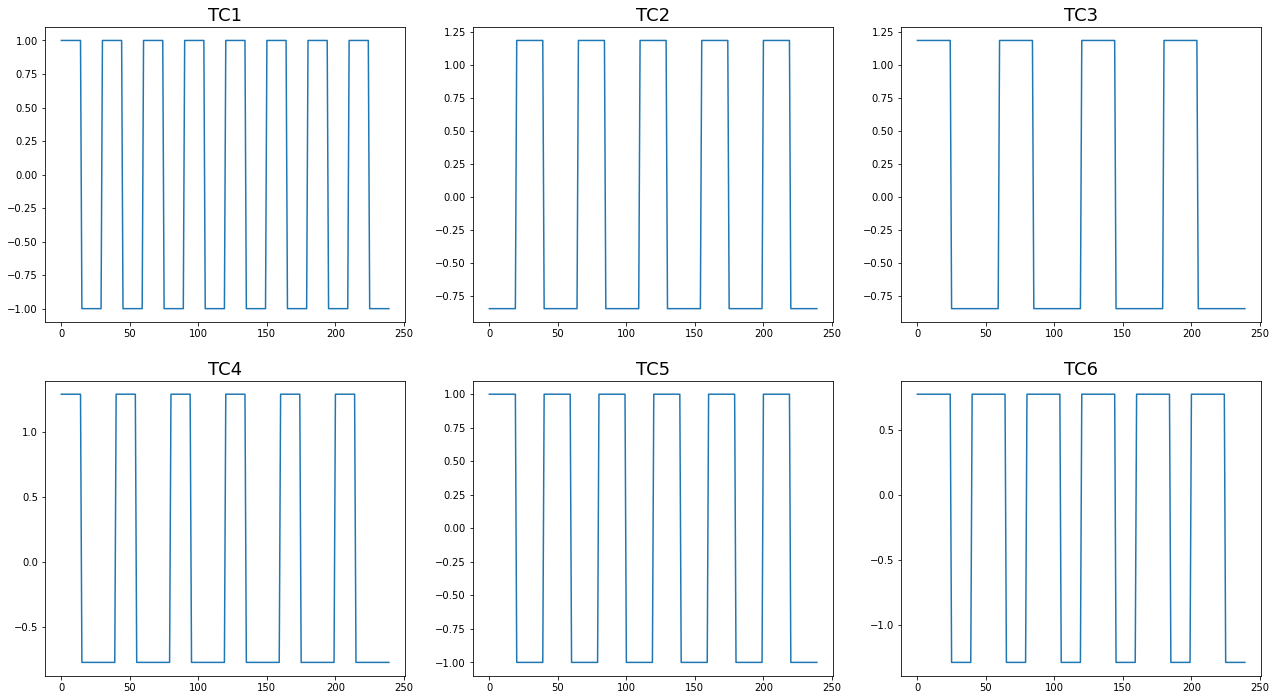

In [742]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (15,8))
axs[0, 0].plot(TC[:,0])
axs[0, 0].set_title('TC1',fontsize = 18)
axs[0, 1].plot(TC[:,1])
axs[0, 1].set_title('TC2',fontsize = 18)
axs[0, 2].plot(TC[:,2])
axs[0, 2].set_title('TC3',fontsize = 18)
axs[1, 0].plot(TC[:,3])
axs[1, 0].set_title('TC4',fontsize = 18)
axs[1, 1].plot(TC[:,4])
axs[1, 1].set_title('TC5',fontsize = 18)
axs[1, 2].plot(TC[:,5])
axs[1, 2].set_title('TC6',fontsize = 18)
fig.tight_layout(pad = 1)
fig.set_size_inches(18, 10)
plt.savefig('../plots/q1-1.png', dpi=100)

# Q1.2

In [743]:
TC = pd.DataFrame(TC)
TC.corr()

,0,1,2,3,4,5
0,1.000000e+00,4.625929e-18,1.690309e-01,0.086066,0.000000e+00,0.086066
1,4.625929e-18,1.000000e+00,-2.857143e-02,0.130931,-2.498002e-17,-0.130931
2,1.690309e-01,-2.857143e-02,1.000000e+00,0.043644,4.903485e-17,0.130931
3,8.606630e-02,1.309307e-01,4.364358e-02,1.000000,7.745967e-01,0.600000
4,0.000000e+00,-2.498002e-17,4.903485e-17,0.774597,1.000000e+00,0.774597
5,8.606630e-02,-1.309307e-01,1.309307e-01,0.600000,7.745967e-01,1.000000


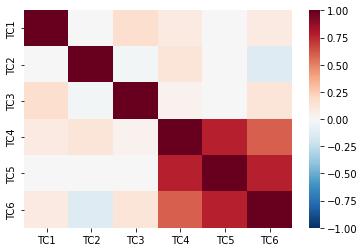

In [744]:
labels = []
for i in range(6):
    labels.append("TC"+ str(i+1))
ax = sns.heatmap(TC.corr(), cmap="RdBu_r", vmax=1, vmin=-1, xticklabels=labels, yticklabels=labels)
plt.savefig('../plots/q1-2.png', dpi=100, bbox_inches="tight")

# Q1.3

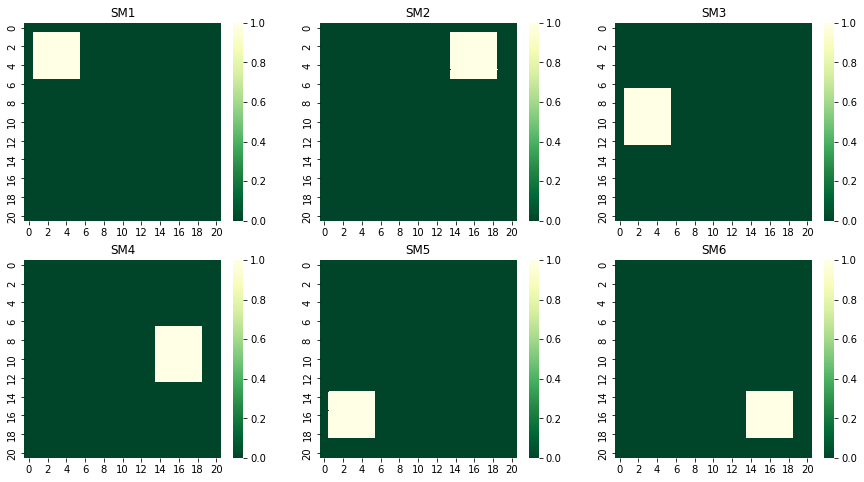

In [745]:
def makesm(range_a, range_b):
    sm = pd.DataFrame(np.zeros((21,21)))
    sm.iloc[range_a[0]:range_a[1], range_b[0]:range_b[1]] = 1
    return sm
SM1 = makesm((1,6), (1,6))
SM2 = makesm((1,6), (14,19))
SM3 = makesm((7,13), (1,6))
SM4 = makesm((7,13), (14,19))
SM5 = makesm((14,19), (1,6))
SM6 = makesm((14,19), (14,19))
fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (15,8))
sns.heatmap(SM1, ax=axs[0,0], cmap="YlGn_r").set_title("SM1")
sns.heatmap(SM2, ax=axs[0,1], cmap="YlGn_r").set_title("SM2")
sns.heatmap(SM3, ax=axs[0,2], cmap="YlGn_r").set_title("SM3")
sns.heatmap(SM4, ax=axs[1,0], cmap="YlGn_r").set_title("SM4")
sns.heatmap(SM5, ax=axs[1,1], cmap="YlGn_r").set_title("SM5")
sns.heatmap(SM6, ax=axs[1,2], cmap="YlGn_r").set_title("SM6")
plt.savefig("../plots/q1-3.png", dpi=100)

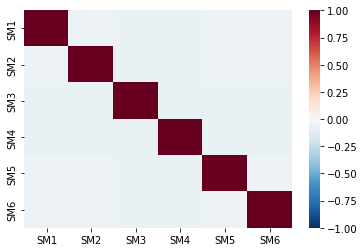

In [746]:
SM = np.zeros((6,441))
SM[0] = SM1.values.flatten(order = 'F')
SM[1] = SM2.values.flatten(order = 'F')
SM[2] = SM3.values.flatten(order = 'F')
SM[3] = SM4.values.flatten(order = 'F')
SM[4] = SM5.values.flatten(order = 'F')
SM[5] = SM6.values.flatten(order = 'F')
SM = pd.DataFrame(SM)
sm_labels = []
for i in range(6):
    sm_labels.append("SM"+ str(i+1))
ax = sns.heatmap(SM.transpose().corr(), cmap="RdBu_r", vmax=1, vmin=-1, 
                            xticklabels=sm_labels, yticklabels=sm_labels)
plt.savefig('../plots/q1-3(b).png', dpi=100, bbox_inches="tight")


# Q1.4

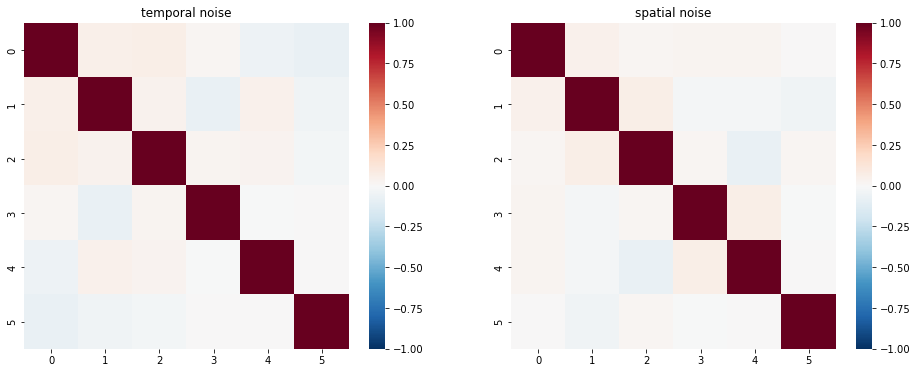

In [747]:
from math import sqrt
np.random.seed(48)
noise_t = pd.DataFrame(np.random.normal(0, sqrt(0.25), (240,6)))
noise_s = pd.DataFrame(np.random.normal(0, sqrt(0.015), (6,441)))
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.heatmap(noise_t.corr(), ax=ax1, cmap="RdBu_r", vmax=1, vmin=-1) \
            .set_title("temporal noise")
sns.heatmap(noise_s.transpose().corr(), ax=ax2, cmap="RdBu_r", vmax=1, vmin=-1) \
            .set_title("spatial noise")
plt.savefig('../plots/q1-4(a).png', dpi=100)

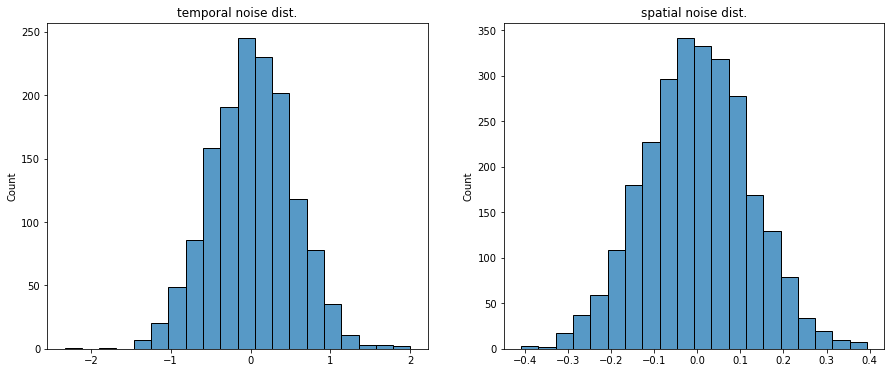

In [748]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.histplot(noise_t.values.flatten(order='F'),ax=ax1,bins=20) \
    .set_title("temporal noise dist.")
sns.histplot(noise_s.values.flatten(order='F'),ax=ax2,bins=20) \
    .set_title("spatial noise dist.")
plt.savefig('../plots/q1-4(b).png', dpi=100)

In [749]:
mask = np.random.normal(0, sqrt(0.25), 240*6)<0.98
# if we calculate the cumulative density below 1.96*sigma for both noise distributions
# we can see both results are around 0.975 which is what we expected
p = len(np.random.normal(0, sqrt(0.25), 240*6)[mask])/(240*6)
print("for temporal noise: P(x<1.96*sd(noise_t)) = ", p)
mask = np.random.normal(0, sqrt(0.015), 441*6)<1.96*sqrt(0.015)
p = len(np.random.normal(0, sqrt(0.015), 441*6)[mask])/(441*6)
print("for spatial noise: P(x<1.96*sd(noise_s)) = ", p)

for temporal noise: P(x<1.96*sd(noise_t)) =  0.9777777777777777
for spatial noise: P(x<1.96*sd(noise_s)) =  0.9750566893424036


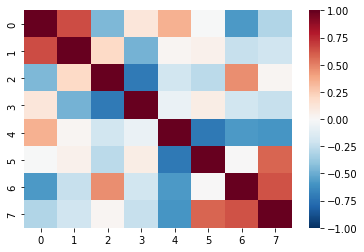

In [750]:
mul_noise = pd.DataFrame(noise_t @ noise_s)
# mul_noise.shape
ax = sns.heatmap(mul_noise.iloc[:, 0:8].corr(), cmap="RdBu_r", vmax=1, vmin=-1)
plt.savefig('../plots/q1-4(c).png', dpi=100)

# Q1.5

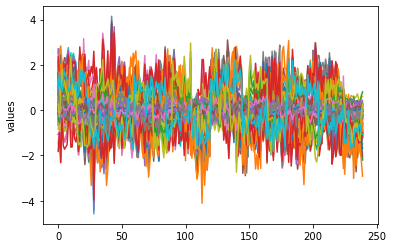

In [751]:
X = (TC + noise_t) @ (SM + noise_s)
# X = TC@SM + noise_t@noise_s
data =  X.sample(100, axis=1)
for i in range(100):
    plt.plot(data.iloc[:,i])
plt.ylabel("values")
plt.savefig('../plots/q1-5(a).png', dpi=100)

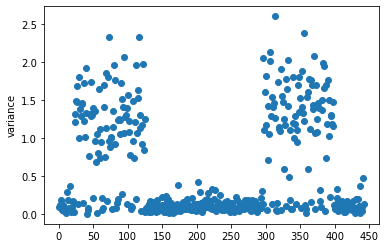

In [752]:
var_data = []
for i in range(441):
    var_data.append(X.iloc[:, i].var())
x = np.linspace(1,442, num=441)
x_t = np.linspace(0,450,10)
plt.scatter(x,var_data)
plt.xticks(x_t)
plt.ylabel("variance")
plt.savefig('../plots/q1-5(b).png', dpi=100)

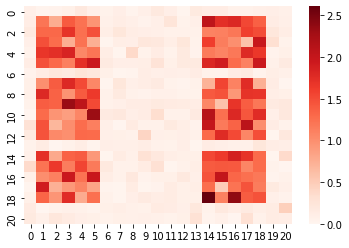

In [753]:
var_data = np.array(var_data).reshape(21,21,order='F')
sns.heatmap(var_data, vmin=0, cmap ='Reds')
plt.savefig('../plots/q1-5(c).png', dpi=100)

## standardise the X

In [754]:
X_standard = (X - np.mean(X, axis =0)) / np.std(X, axis=0)

# Q2.1

In [755]:
A_lsr = np.linalg.inv(TC.transpose() @ TC) @ TC.transpose() @ X_standard
D_lsr = X_standard @ A_lsr.transpose()
D_lsr_abs = X_standard @ np.abs(A_lsr.transpose())
A_lsr

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,-0.467465,-0.110709,-0.146217,-0.077774,-0.478770,0.439057,0.484105,0.647237,0.252874,-0.595098,...,0.455172,0.055263,-0.024122,-0.304425,0.026067,-0.295763,0.339169,-0.347421,0.074715,0.238951
1,-0.049163,-0.250390,-0.420086,0.700877,-0.348586,0.279877,-0.152759,-0.233452,0.043005,0.115329,...,0.248895,-0.509514,-0.621159,-0.192476,0.173041,-0.229313,0.410169,-0.075932,-0.109475,0.678126
2,-0.306363,-0.368915,-0.066991,-0.134719,0.339560,0.177649,-0.430020,0.063284,0.121647,0.186587,...,-0.395163,-0.039535,-0.586456,-0.157188,0.266553,-0.052593,0.106535,0.669157,0.039598,-0.195807
3,0.595597,0.007095,-0.711021,0.304259,0.674038,-0.258177,-0.413380,-0.171525,0.079767,-0.307287,...,0.012285,0.579085,0.342603,0.325311,0.978973,-0.653247,-0.186801,0.353975,0.366575,-0.260378
4,-0.120214,-0.290406,-0.092294,0.122042,-0.461805,0.350403,0.529587,0.790028,-0.292428,0.842828,...,0.406411,-0.091426,-0.111053,0.445205,-0.261650,0.804644,0.149686,-0.138556,0.434467,-0.265132
5,-0.672335,-0.545969,0.201108,0.157306,0.362368,-0.779799,0.382189,-0.196854,-0.692874,-0.132957,...,0.337214,0.342613,-0.332258,0.168043,-0.252005,-0.627884,0.723022,0.369822,0.224790,-0.070626


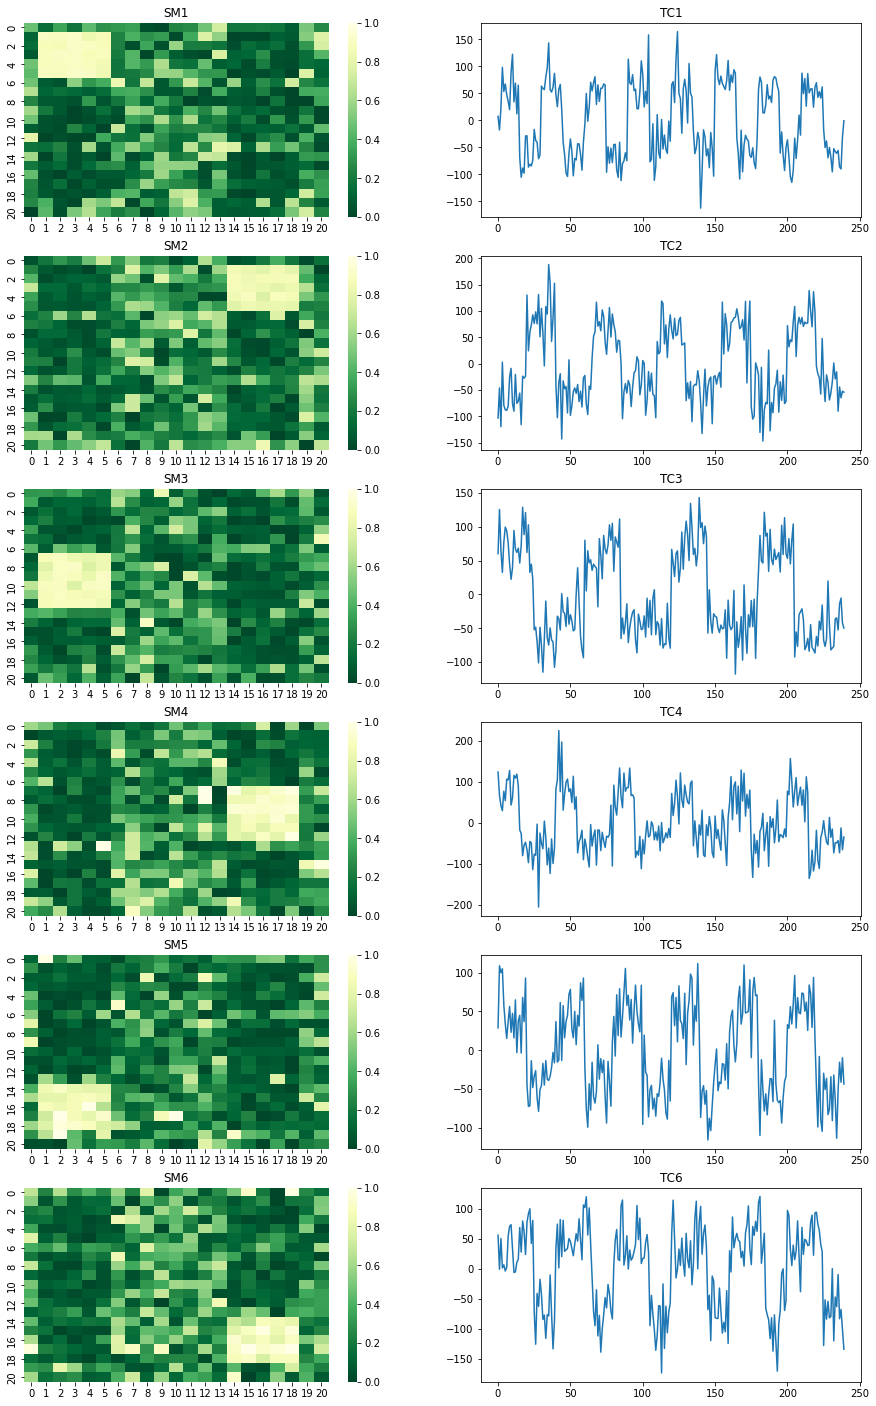

In [784]:
fig, axs = plt.subplots(nrows=6, ncols=2, figsize = (15,25))
for i in range(6):
    data = np.array(A_lsr.iloc[i,:]).reshape(21,21,order='F')
    sns.heatmap(np.abs(data),ax=axs[i,0], cmap="YlGn_r", vmin=0, vmax=1).set_title("SM"+str(i+1))
for i in range(6):
    data = np.array(D_lsr.iloc[:,i])
    axs[i,1].set_title("TC"+str(i+1))
    axs[i,1].plot(data)
plt.savefig('../plots/q2-1(a).png', dpi=100, bbox_inches="tight")


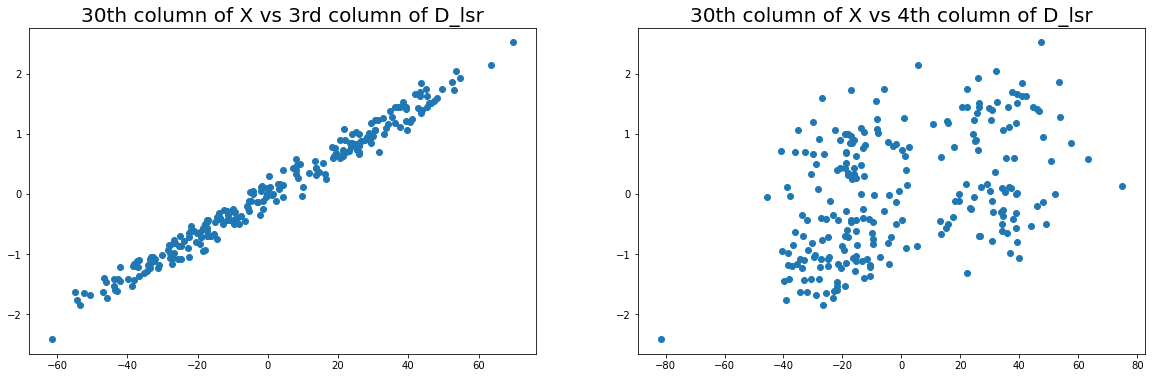

In [785]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax1.set_title("30th column of X vs 3rd column of D_lsr", fontsize=20)
ax1.scatter(D_lsr_abs.iloc[:, 2], X_standard.iloc[:, 29])
ax2.set_title("30th column of X vs 4th column of D_lsr", fontsize=20)
ax2.scatter(D_lsr_abs.iloc[:, 3], X_standard.iloc[:, 29])
plt.savefig('../plots/q2-1(b).png', dpi=100, bbox_inches="tight")


# Q2.2

### use "check and guess method" to find lambda

In [796]:
V = 441
lambd = 0
I = np.identity(6)
check_result = []
while (lambd <= 1):
    r = 0
    lambda_tilde = V * lambd
    A_rr = np.linalg.inv(TC.transpose() @ TC + lambda_tilde*I)@TC.transpose() @ X_standard
    D_rr = X_standard @ A_rr.transpose()
    # If you want to apply absolute operation on A and so D, 
    # remove the above line and put the following line back
    # D_rr = X_standard @ np.abs(A_rr.transpose())

    for i in range(6):
        r += abs(np.corrcoef(D_rr.iloc[:,i], TC.iloc[:,i])[0][1])
    check_result.append(r)
    lambd += 0.01


In [800]:
lambd = 0.01*(check_result.index(max(check_result)))
lambda_tilde = V * lambd
print("lambda: ", lambd)
print("lambda_tilde: ", lambda_tilde, '\n')

A_rr = np.linalg.inv(TC.transpose() @ TC + lambda_tilde*I)@TC.transpose() @ X_standard
D_rr = X_standard @ A_rr.transpose()
D_rr_abs = X_standard @ np.abs(A_rr.transpose())
c_tlsr = []
c_trr = []
for i in range(6):
    c_tlsr.append(np.corrcoef(D_lsr_abs.iloc[:,i], TC.iloc[:,i])[0][1])
print("c_tlsr: ",c_tlsr)
print("sum(c_tlsr): ", sum(c_tlsr))
for i in range(6):
    # c_trr.append(np.corrcoef(D_rr_abs.iloc[:,i], TC.iloc[:,i])[0][1])
    c_trr.append(np.corrcoef(D_rr.iloc[:,i], TC.iloc[:,i])[0][1])
print("c_trr: ",c_trr)
print("sum(c_trr): ", sum(c_trr))


lambda:  0.37
lambda_tilde:  163.17 

c_tlsr:  [0.7915120644460352, 0.7084904512102534, 0.8309877790469835, 0.8988637509285832, 0.9096962903999319, 0.906308059230788]
sum(c_tlsr):  5.0458583952625755
c_trr:  [0.8952800474076318, 0.8665045417136037, 0.894490647201397, 0.9058173508722914, 0.9196441297059272, 0.9193631732666374]
sum(c_trr):  5.4010998901674885


### Run the following bloc if you have applied absolute operation on A_rr
### and this will generate a plot comparing the sum correlationg between LSR and RR

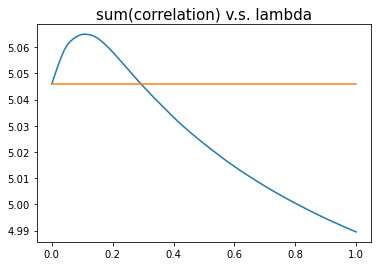

In [795]:
# x =  np.linspace(0,1, num=100)
# y = np.full(100, sum(c_tlsr))
# plt.plot(x, check_result)
# plt.plot(x, y)
# plt.title("sum(correlation) v.s. lambda", fontsize = 15)
# plt.savefig('../plots/q2-2(b).png', dpi=100)

## without absolute operation

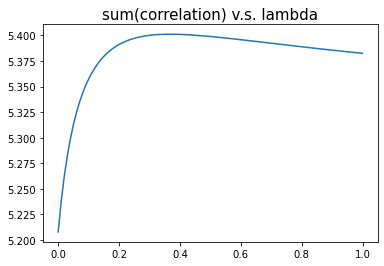

In [773]:
x =  np.linspace(0,1, num=100)
plt.plot(x, check_result)
plt.title("sum(correlation) v.s. lambda", fontsize = 15)
plt.savefig('../plots/q2-2(c).png', dpi=100)

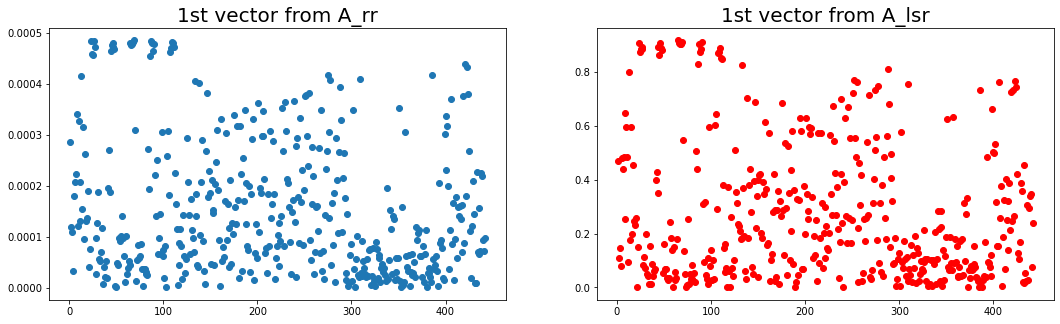

In [790]:
lambda_tilde = 1000 * V
A_rr = np.linalg.inv(TC.transpose() @ TC + lambda_tilde*I)@TC.transpose() @ X_standard
x = np.linspace(1,442, num=441)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
ax1.figsize = (1,5)
ax1.scatter(x, np.abs(A_rr).iloc[0, :])
ax1.set_title("1st vector from A_rr", fontsize=20)
ax2.scatter(x, np.abs(A_lsr).iloc[0, :], color ='r')
ax2.set_title("1st vector from A_lsr", fontsize=20)
plt.savefig('../plots/q2-2(a).png', dpi=100, bbox_inches ="tight")


# Q2.3

### Below is a function transformed from the "R code for LR". Note that on the spec, in the formula for estimating LASSO parameters, Frobenius norm is used, while in the R code, the default norm() is used which is actually 'one norm'. I used one norm here, but they actually don't have much difference regarding the results

In [762]:
def find_Alr(rho, X, D):
    # whether 'one norm' or 'Frobenius norm' is used makes no much difference
    step = 1/(np.linalg.norm(D@D.transpose(), 1) * 1.1)
    thr = rho*240*step
    Ao = np.zeros((6,1))
    A = np.zeros((6,1))
    Alr = np.zeros((6,V))
    for i in range(V):
        X_temp = np.matrix(X[:,i]).transpose()
        A = Ao + step * (D.transpose() @ (X_temp - (D@Ao)))
        A = (1/(1+thr)) * np.multiply(np.sign(A), np.maximum(np.zeros((6,1)), (np.abs(A)-thr)))
        for j in range(10):
            Ao = A
            A = Ao +step * (D.transpose() @ (X_temp - (D@Ao)))
            A = (1/(1+thr)) * np.multiply(np.sign(A), np.maximum(np.zeros((6,1)), (np.abs(A)-thr)))
        Alr[:, i] = A.transpose()

    return Alr

### Calculate the mean MSE for each rho values over 10 realisations
### When calculate the MSE, absolute operation is not applied on A

In [763]:
rho = np.linspace(0,1, num=21)
D = np.array(TC)
avg_mse = []
for i in range(len(rho)):
    total_mse = 0
    for j in range(10):
        noise_t = np.random.normal(0, sqrt(0.25), (240,6))
        noise_s = np.random.normal(0, sqrt(0.015), (6,441))
        X_t = (D + noise_t) @ (np.array(SM) + noise_s)
        X_s = (X_t - np.mean(X_t, axis =0)) / np.std(X_t, axis=0)
        Alr = find_Alr(rho[i], X_s, D)
        Dlr = X_s @ Alr.transpose()
        total_mse += (np.sum((X_s - Dlr@Alr)**2)) / (240*441) 
    avg_mse.append(total_mse/10)


In [764]:
print(avg_mse)
print("Minimum Mse: ", min(avg_mse))

[2959.709816155825, 1662.5146779948798, 940.8147926112376, 530.9265581822493, 285.20190277407823, 148.01587421355637, 74.94225971637759, 37.43017217889572, 16.696230281893765, 6.396590864671401, 2.322903874158443, 0.8058843213350789, 0.4588945010316328, 0.5569914797167941, 0.7382164080473862, 0.8862927770304843, 0.9674960892644238, 0.9968169352894745, 0.9999873654275035, 1.0, 1.0]
Minimum Mse:  0.4588945010316328


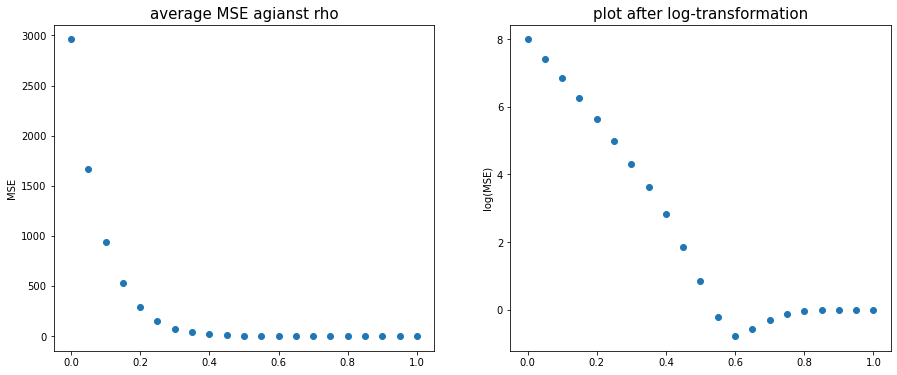

In [792]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize= (15,6))
ax1.scatter(rho, avg_mse)
ax1.set(ylabel='MSE')
ax1.set_title("average MSE agianst rho", fontsize=15)

ax2.scatter(rho, np.log(avg_mse))
ax2.set_title("plot after log-transformation", fontsize=15)
ax2.set(ylabel="log(MSE)")
plt.savefig('../plots/q2-3(a).png', dpi=100, bbox_inches="tight")

# Q2.4


## set rho=0.6 and lambda = 0.37 --> lambda_tilde = 163.17

## compute the maximum absolute correlations as required

In [803]:
lambda_tilde = V * 0.37

A_rr = np.linalg.inv(TC.transpose() @ TC + lambda_tilde*I)@TC.transpose() @ X_standard
D_rr = X_standard @ A_rr.transpose()
D_rr_abs = X_standard @ np.abs(A_rr.transpose())
A_lr = find_Alr(0.6, np.array(X_standard), D)
D_lr = X_standard @ A_lr.transpose()
D_lr_abs = X_standard @ np.abs(A_lr.transpose())

# compute c_tlr
c_tlr = []
for i in range(6):
    # c_tlr.append(np.corrcoef(D_lr.iloc[:,i], TC.iloc[:,i])[0][1])
    c_tlr.append(np.corrcoef(D_lr.iloc[:,i], TC.iloc[:,i])[0][1])
print("c_tlr: ",c_tlr)
print("sum(c_tlr): ", sum(c_tlr))
# c_trr has already been computed
print("c_trr: ",c_trr)
print("sum(c_trr): ", sum(c_trr), "\n")

# compute c_slr and c_srr
c_slr = []
for i in range(6):
    # c_slr.append(np.corrcoef(A_lr[i,:], SM.iloc[i,:])[0][1])
    c_slr.append(np.corrcoef(np.abs(A_lr)[i,:], SM.iloc[i,:])[0][1])
print("c_slr: ",c_slr)
print("sum(c_slr): ", sum(c_slr))

c_srr = []
for i in range(6):
    # c_srr.append(np.corrcoef(A_rr.iloc[i,:], SM.iloc[i,:])[0][1])
    c_srr.append(np.corrcoef(np.abs(A_rr).iloc[i,:], SM.iloc[i,:])[0][1])
print("c_srr: ",c_srr)
print("sum(c_srr): ", sum(c_srr), "\n")

c_tlr:  [0.8967295424223457, 0.8708267842196334, 0.9012299524268038, 0.8971062310388341, 0.9186453777904329, 0.9193631278519991]
sum(c_tlr):  5.403901015750049
c_trr:  [0.8952800474076318, 0.8665045417136037, 0.894490647201397, 0.9058173508722914, 0.9196441297059272, 0.9193631732666374]
sum(c_trr):  5.4010998901674885 

c_slr:  [0.9097979042804885, 0.8406827803909253, 0.9147957380575708, 0.8541121581403577, 0.7890716262891598, 0.7803794084413394]
sum(c_slr):  5.088839615599841
c_srr:  [0.5956194680369286, 0.5595920909006901, 0.6552026317814782, 0.6016771429220861, 0.5396227809524332, 0.5484446250737172]
sum(c_srr):  3.5001587396673335 



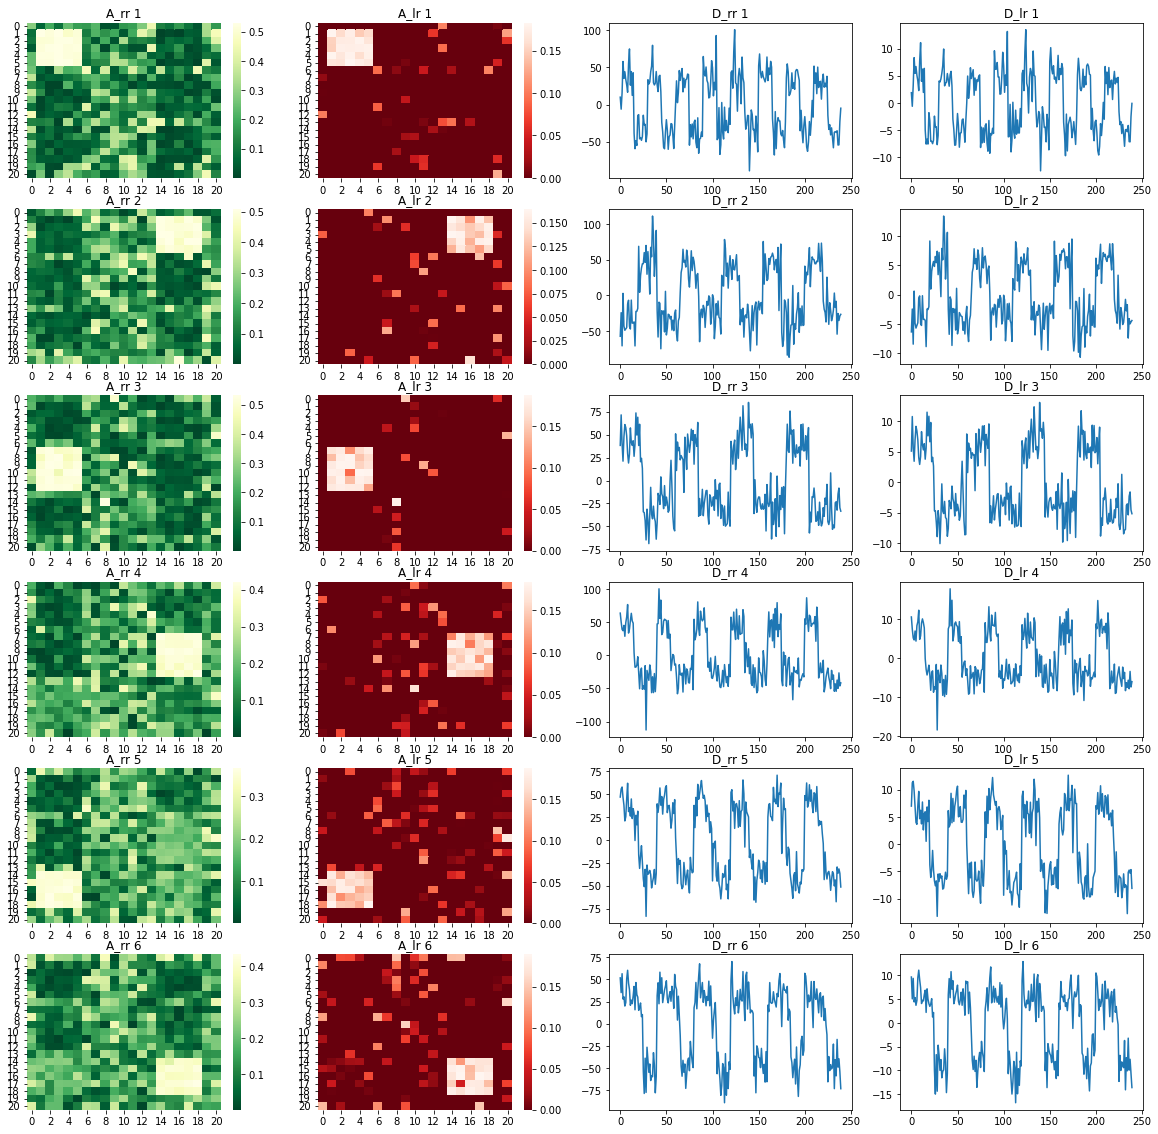

In [804]:
fig, axs = plt.subplots(nrows=6, ncols=4, figsize = (18,30))
for i in range(6):
    # plot A_rr heatmap
    data = np.array(A_rr.iloc[i,:]).reshape(21,21,order='F')
    sns.heatmap(np.abs(data),ax=axs[i,0], cmap="YlGn_r").set_title("A_rr "+str(i+1))
    # plot A_lr
    data = A_lr[i,:].reshape(21,21,order='F')
    sns.heatmap(np.abs(data),ax=axs[i,1], cmap="Reds_r").set_title("A_lr "+str(i+1))
for i in range(6):
    # plot D_rr
    data = np.array(D_rr.iloc[:,i])
    axs[i,2].set_title("D_rr "+str(i+1))
    axs[i,2].plot(data)
    # plot D_lr
    data = np.array(D_lr.iloc[:,i])
    axs[i,3].set_title("D_lr "+str(i+1))
    axs[i,3].plot(data)
fig.set_size_inches(20, 20)
plt.savefig('../plots/q2-4(a).png', dpi=100, bbox_inches="tight")

# Q2.5

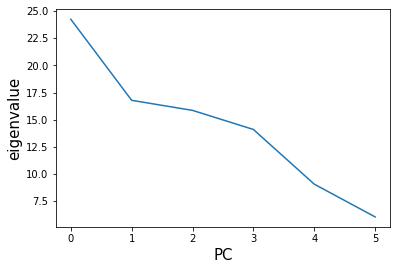

In [809]:
U, S, Vt = np.linalg.svd(np.array(TC), full_matrices=True)
plt.plot(S)
plt.ylabel("eigenvalue", fontsize=15)
plt.xlabel("PC", fontsize=15)
plt.savefig('../plots/q2-5(a).png', dpi=100)

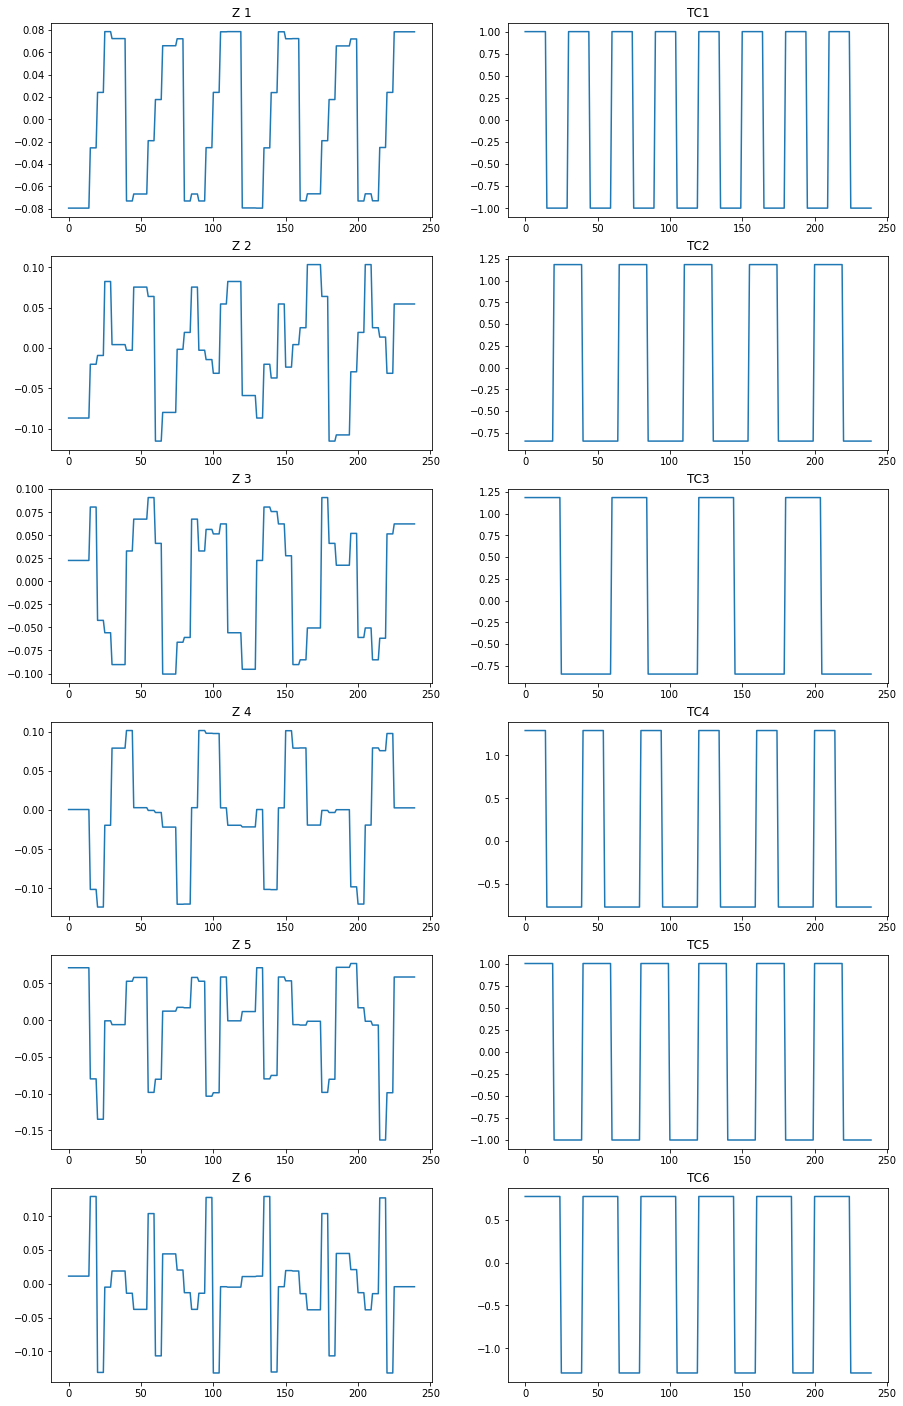

In [806]:
Z = U[:, 0:6]
fig, axs = plt.subplots(nrows=6, ncols=2, figsize = (15,25))
for i in range(6):
    # plot Z
    data = np.array(Z[:,i])
    axs[i,0].set_title("Z "+str(i+1))
    axs[i,0].plot(data)
    # plot TC
    data = np.array(TC.iloc[:,i])
    axs[i,1].set_title("TC"+str(i+1))
    axs[i,1].plot(data)
plt.savefig('../plots/q2-5(b).png', dpi=100, bbox_inches="tight")


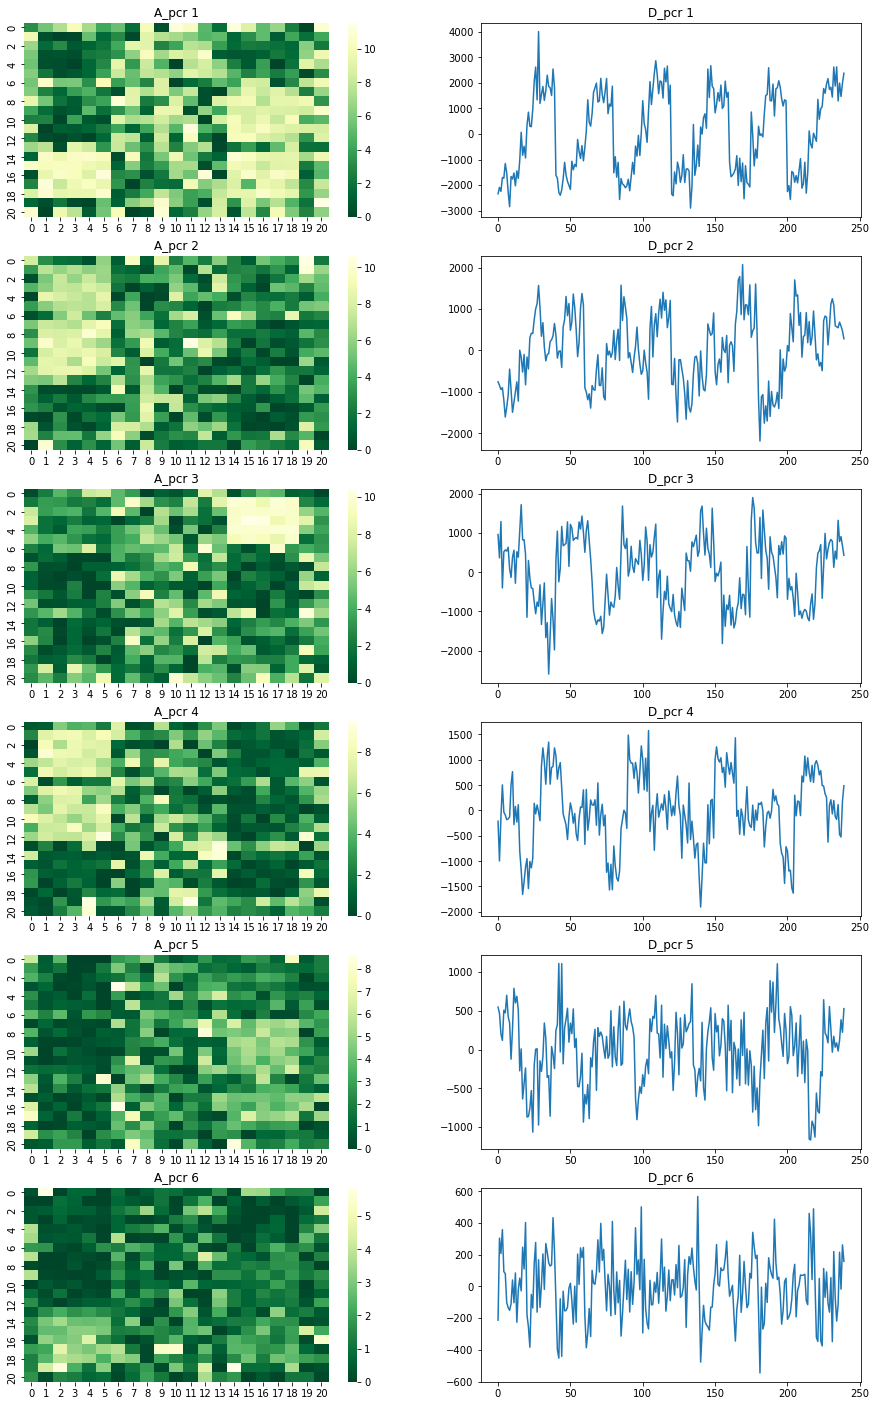

In [807]:
A_pcr = find_Alr(0.001, np.array(X_standard), np.array(Z))
D_pcr = X_standard @ A_pcr.transpose()
fig, axs = plt.subplots(nrows=6, ncols=2, figsize = (15,25))
for i in range(6):
    data = np.array(A_pcr[i,:]).reshape(21,21,order='F')
    sns.heatmap(np.abs(data),ax=axs[i,0], cmap="YlGn_r").set_title("A_pcr "+str(i+1))
for i in range(6):
    data = np.array(D_pcr.iloc[:,i])
    axs[i,1].set_title("D_pcr "+str(i+1))
    axs[i,1].plot(data)
plt.savefig('../plots/q2-5(c).png', dpi=100, bbox_inches="tight")